### Nini, Carter, Ryogo

# Lab 6 - Radiative Diffusion

In this lab, we'll investigate how photons diffuse through a star.
Follow the directions [here](https://www.astronomyguide.org/dev/Focus-Group-Activities/Python-Scaffolded-Activity.html)! (Make sure you do the "Scaffolded Python Activity")

(Note: this lab has been adapted with permission from Alex DelFranco's senior thesis project)

In [2]:
# Leave this cell alone - this is just to make the code work with Colab!
from google.colab import output
output.enable_custom_widget_manager()

### Import packages

In [3]:
import matplotlib.pyplot as plt

import numpy as np

import math as m

### Model

In [4]:
def model(radius):
  X = 0
  Y = 0
  X_list = []
  Y_list = []
  step_length = 1
  N = 0
  while m.sqrt(X**2 + Y**2) < radius:
    N = N + 1
    angle = 2 * np.pi * np.random.random()
    X_list.append(X)
    Y_list.append(Y)
    X = X + step_length * m.cos(angle)
    Y = Y + step_length * m.sin(angle)
  return(X_list,Y_list,N)

### Viewing

Text(0.5, 1.0, 'Step Count:9898')

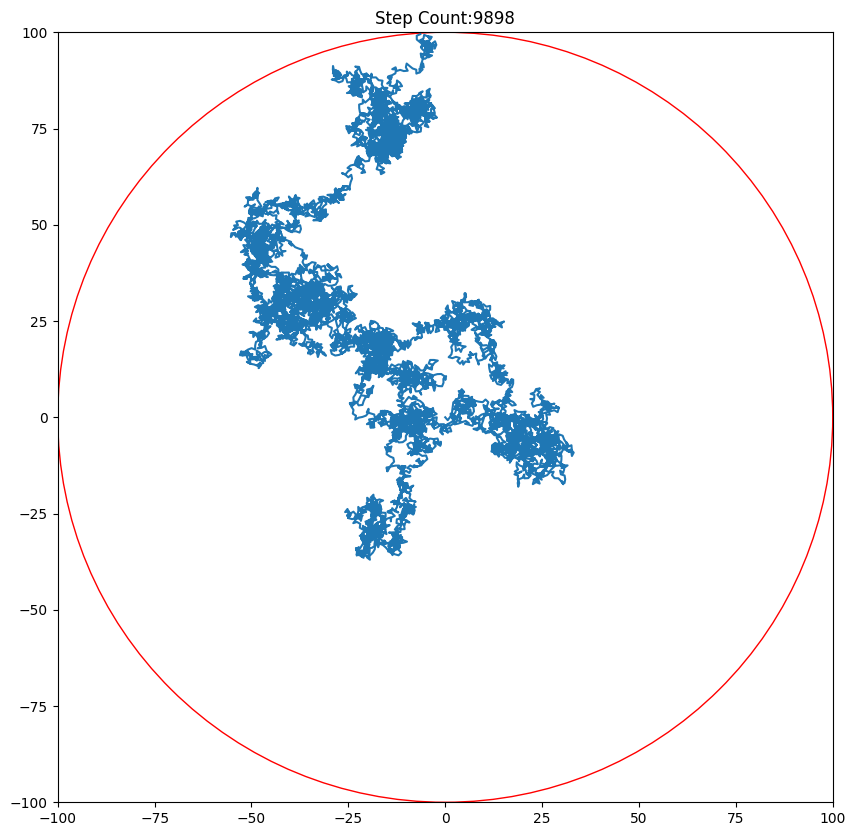

In [5]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
R = 100
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)
star = plt.Circle((0,0),R,fill=False,color='red')
ax.add_patch(star)
x,y,N = model(R)
ax.plot(x,y)
ax.set_title('Step Count:' + str(N))

### Conceptual questions

1. Is it possible to use this simulation to directly model how long it takes a real photon to "escape" the Sun? Why or why not?

*No, because there is a change in density at different points in the Sun and the step length varies. Also, we set this star to have a radius of about 100 units, which is not accurate to difference in size of the radius of the Sun and the step length. Another thing this model does not account for is temperature.*

2. What is the approximate relation between $\frac{r}{l}$ and $N$ (where $l$ is the step length in the model)?

*As r decreases, N decreases, and as l increases, N decreases. Therefore, the ratio r/l decreases, N decreases. N and r/l are proportional.*

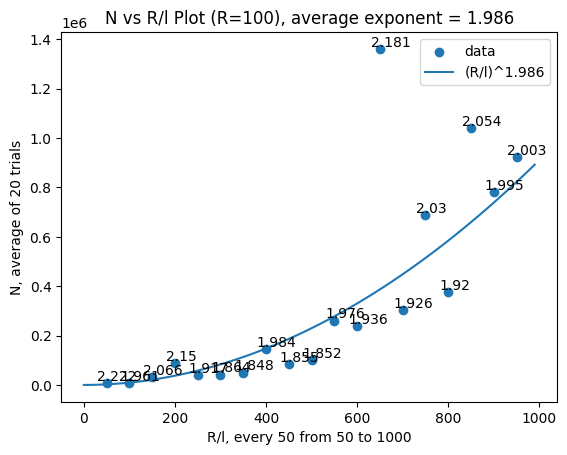

In [16]:
# you may want to use this cell to make plots!
def newmodel(radius, step_length):
  X = 0
  Y = 0
  N = 0
  N_sum = 0
  count = 0
  while count <20:
    while m.sqrt(X**2 + Y**2) < radius:
      N = N + 1
      angle = 2 * np.pi * np.random.random()
      X = X + step_length * m.cos(angle)
      Y = Y + step_length * m.sin(angle)
    N_sum += N
    count += 1
  N_avg = N_sum/20
  return(N_avg)

R=100
x_var = np.arange(50, 1000, 50)

l_length=[]

for variable in x_var:
  l_length.append(R/variable)

y_var = []
exponent = []
exp_sum = 0
for element in l_length:
  N_avg = newmodel(R, element)
  y_var.append(N_avg)
  each_exp = m.log(N_avg, R/element)
  exponent.append(each_exp)
  exp_sum += each_exp

fig, ax = plt.subplots()
exp_avg = exp_sum/(len(x_var))
ax.scatter(x_var,y_var, label="data")

for i in range(len(x_var)):
  ax.text(x_var[i]-20, y_var[i]+10000, round(exponent[i], 3))

x = np.arange(0,1000, 10)
ax.plot(x, x**(exp_avg), label="(R/l)^"+str(round(exp_avg, 3)))

ax.set_title("N vs R/l Plot (R=100), average exponent = "+str(round(exp_avg, 3)))
ax.set_xlabel("R/l, every 50 from 50 to 1000")
ax.set_ylabel("N, average of 20 trials")
plt.legend()

plt.show()

3. What is the number of total steps a photon needs to take to "escape" the Sun?

*From the graph above, we can estimate that the exponent is ~2. Then,*
$$N=(\frac{R}{l})^{2}=(\frac{7 \times 10^{10}}{1})^{2}=4.9 \times 10^{21}$$
*so, 4.9 x 10^21 steps*

4. Given your answer to the last question, how long does it take the photon to escape the Sun? Does the answer surprise you? Why or why not?

*Time it takes for photon to travel each step is l/c=1cm/c. So, the total time it takes is N x 1cm/c = 1.63 x 10^11 seconds, which is about 5175 years. This answer does not surprise us because the step length of a photon is very short in comparison to the radius of the Sun and we are not guaranteed that every step will be away from the center of the Sun, which means that if the photon 'steps' in the direction of the center of the Sun, it is almost backtracking, meaning that it will have to take more step(s) to go back to a position closer to the surface or exiting from the Sun. We might even be able to conclude that this is short, as the mean free length of 1 cm seems long considering the density of particles.*

5. Does a higher opacity lead to a shorter or longer escape time? Does a higher density lead to a shorter or longer escape time? Do your conclusions make sense?

*Greater opacity and/or density leads to longer time for exiting the star because the path length gets decreased. \\
This makes sense because the higher density implies that the photons encounter other particles more frequently, which makes photons difficult to pass through. The higher opacity indicates that the absorption/scattering is more effective in the medium, causing the energy loss. Therefore, in both cases,the mean free path becomes shorter, which causes the escape time to be longer.*

6. By what factor would the escape time change if:
* the density of the star was doubled?  *2 times*
* the opacity was doubled?  *2 times*
* the radius was doubled?  *4 times*

7. **BONUS**: Make three graphs, one with density on the x-axis, one with opacity on the x-axis, and one with radius on the x-axis. Put escape time on the y-axis for all three and then plot a handful of values until you have a general relation. Are the relations intuitive?

*your answer here*

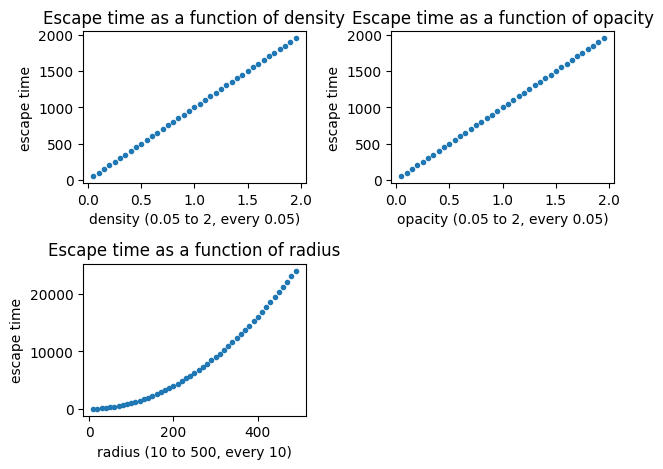

In [21]:
# can put plotting code here

def anothermodel(R, d, k):
  l = 1/(d*k)
  N = (R/l)**2
  #for simplicity, let c be any constant, which does not affect how the relationship is
  c = 10
  t = N*l/c
  return t

#default values
R = 100
d = 1
k = 1

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

#plot vs density
x = np.arange(0.05, 2, 0.05)
ax1.scatter(x, anothermodel(R, x, k), marker=".")
ax1.set_title("Escape time as a function of density")
ax1.set_xlabel("density (0.05 to 2, every 0.05)")
ax1.set_ylabel("escape time")

#plot vs opacity
x = np.arange(0.05, 2, 0.05)
ax2.scatter(x, anothermodel(R, d, x), marker=".")
ax2.set_title("Escape time as a function of opacity")
ax2.set_xlabel("opacity (0.05 to 2, every 0.05)")
ax2.set_ylabel("escape time")

#plot vs Radius
x = np.arange(10, 500, 10)
ax3.scatter(x, anothermodel(x, d, k), marker=".")
ax3.set_title("Escape time as a function of radius")
ax3.set_xlabel("radius (10 to 500, every 10)")
ax3.set_ylabel("escape time")

ax4.axis("off")
plt.tight_layout()
plt.show()

*It makes sense and agress with the previous question. The fact that these three variables relate to the escape time with such simple factors is not intuitive but is cool.*

# Submission instructions

Please follow the following steps:

**1) Make sure the names of all group members are in a markdown cell at the top of the file.**

**2) Save the Colab notebook as a PDF.**

**3) Upload the PDFs to Gradescope.**

***IMPORTANT NOTE: CHECK YOUR PDF BEFORE SUBMITTING.*** If any code/outputs/comments get cut off and prevent us from grading your work, you will not get graded on the cut-off part of the assignment. Here are steps that seem to work well on Google Chrome:
* Make sure all sidebars (like the help/documentation sidebars to the right of the code) are closed.
* Go to Tools > Settings within Colab. Make sure default page layout is "vertical". (Setting the theme to "dark mode" is optional but may also help make your code more readable.)
* Then, go to File > Print within Colab (*not* from the Chrome toolbar). Set "Destination" as "Save to PDF". Under the "More options" tab, make sure "Background graphics" is checked. You may also try changing your margins to "minimum" or "none" to make sure longer comments aren't getting cut off.
* If the end of your notebook is getting cut off, try double clicking on the next cell as if you're going to edit it, then go straight to File > Print without clicking anywhere else on the notebook.

If you run into issues creating your PDF, please let us know so we can offer alternative solutions.